In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
combined_df = pd.read_csv("./output/combined_output.csv")
combined_df

,timestamp,bot,minor,user,domain,new_length,old_length,length_diff,length_diff_percent
0,2024-06-26T14:39:19.000Z,False,False,178.78.252.98,commons.wikimedia.org,2038.0,2037.0,1.0,0.049092
1,2024-06-26T14:39:19.000Z,False,False,Tagishsimon,www.wikidata.org,7561.0,7552.0,9.0,0.119174
2,2024-06-26T14:39:16.000Z,True,False,FlickypediaBackfillrBot,commons.wikimedia.org,6970.0,5446.0,1524.0,27.983841
3,2024-06-26T14:39:18.000Z,False,False,Ameisenigel,www.wikidata.org,60342.0,60009.0,333.0,0.554917
4,2024-06-26T14:39:16.000Z,True,False,FlickypediaBackfillrBot,commons.wikimedia.org,11672.0,10150.0,1522.0,14.995074
...,...,...,...,...,...,...,...,...,...
289635,2024-06-25T21:22:48.000Z,True,True,FocalPointBot,el.wiktionary.org,299.0,225.0,74.0,32.888889
289636,2024-06-25T21:22:49.000Z,True,False,Wicci'o'Bot,www.wikidata.org,15087.0,14415.0,672.0,4.661811
289637,2024-06-25T21:22:44.000Z,False,False,67.87.196.174,en.wikipedia.org,12848.0,12838.0,10.0,0.077894
289638,2024-06-25T21:22:49.000Z,True,False,MidleadingBot,www.wikidata.org,15547.0,15547.0,0.0,0.000000


In [4]:
#quick clean up of data

cleaned_df = combined_df.dropna()

cleaned_df


,timestamp,bot,minor,user,domain,new_length,old_length,length_diff,length_diff_percent
0,2024-06-26T14:39:19.000Z,False,False,178.78.252.98,commons.wikimedia.org,2038.0,2037.0,1.0,0.049092
1,2024-06-26T14:39:19.000Z,False,False,Tagishsimon,www.wikidata.org,7561.0,7552.0,9.0,0.119174
2,2024-06-26T14:39:16.000Z,True,False,FlickypediaBackfillrBot,commons.wikimedia.org,6970.0,5446.0,1524.0,27.983841
3,2024-06-26T14:39:18.000Z,False,False,Ameisenigel,www.wikidata.org,60342.0,60009.0,333.0,0.554917
4,2024-06-26T14:39:16.000Z,True,False,FlickypediaBackfillrBot,commons.wikimedia.org,11672.0,10150.0,1522.0,14.995074
...,...,...,...,...,...,...,...,...,...
289635,2024-06-25T21:22:48.000Z,True,True,FocalPointBot,el.wiktionary.org,299.0,225.0,74.0,32.888889
289636,2024-06-25T21:22:49.000Z,True,False,Wicci'o'Bot,www.wikidata.org,15087.0,14415.0,672.0,4.661811
289637,2024-06-25T21:22:44.000Z,False,False,67.87.196.174,en.wikipedia.org,12848.0,12838.0,10.0,0.077894
289638,2024-06-25T21:22:49.000Z,True,False,MidleadingBot,www.wikidata.org,15547.0,15547.0,0.0,0.000000


In [5]:
#20% of the data dropped due to nulls

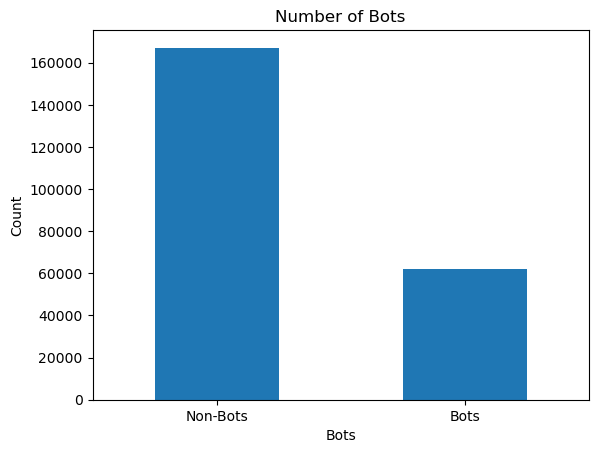

In [6]:
#looking at bot percentage
bot_count = cleaned_df['bot'].value_counts()

bot_count.plot(kind="bar")
plt.xlabel('Bots')
plt.ylabel('Count')
plt.title('Number of Bots')
plt.xticks(ticks=[0, 1], labels=['Non-Bots', 'Bots'], rotation=0)
plt.show()

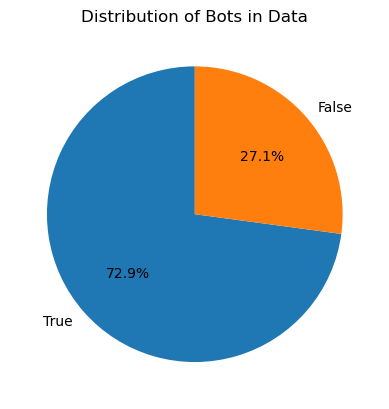

In [9]:
#creating a pie chart for the same information as the bar chart for fun

bot_count.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.ylabel('')  # Hide the y-label
plt.title('Distribution of Bots in Data')
plt.show()

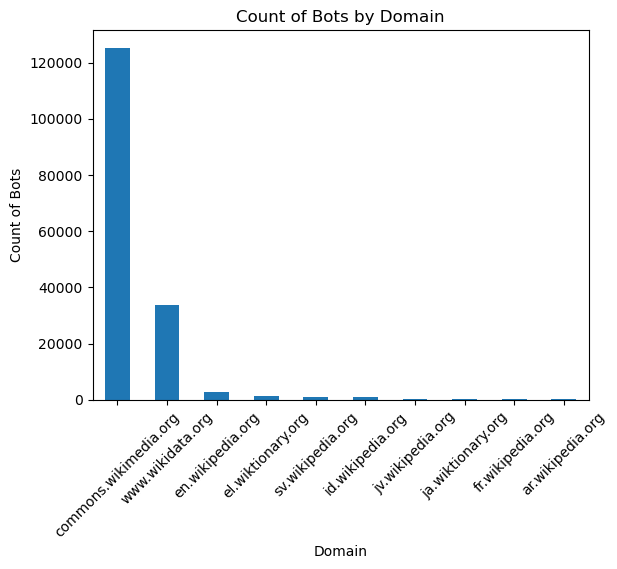

In [14]:
bot_counts_by_domain = cleaned_df[cleaned_df['bot'] == True].groupby('domain').size()
bot_counts_by_domain = bot_counts_by_domain.sort_values(ascending=False).head(10)

# Plotting the bar chart
bot_counts_by_domain.plot(kind='bar')
plt.xlabel('Domain')
plt.ylabel('Count of Bots')
plt.title('Count of Bots by Domain')
plt.xticks(rotation=45)
plt.show()


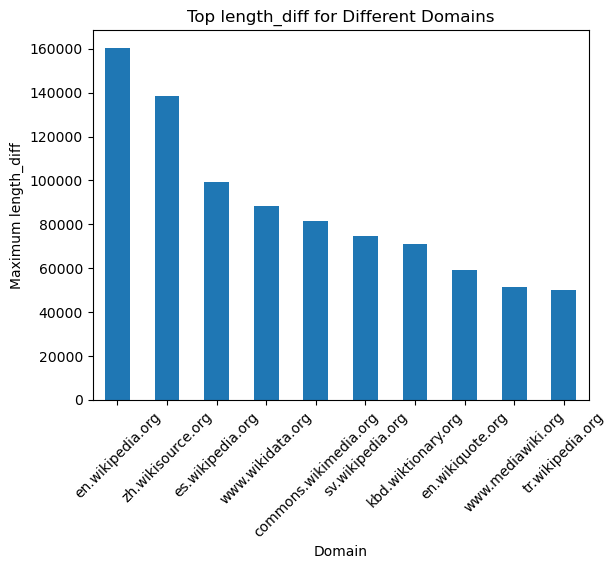

In [22]:
max_length_diff = cleaned_df.groupby('domain')['length_diff'].max()

max_length_diff_sorted = max_length_diff.sort_values(ascending=False).head(10)

# Plotting the bar chart
max_length_diff_sorted.plot(kind='bar')
plt.xlabel('Domain')
plt.ylabel('Maximum length_diff')
plt.title('Top length_diff for Different Domains')
plt.xticks(rotation=45)
plt.show()

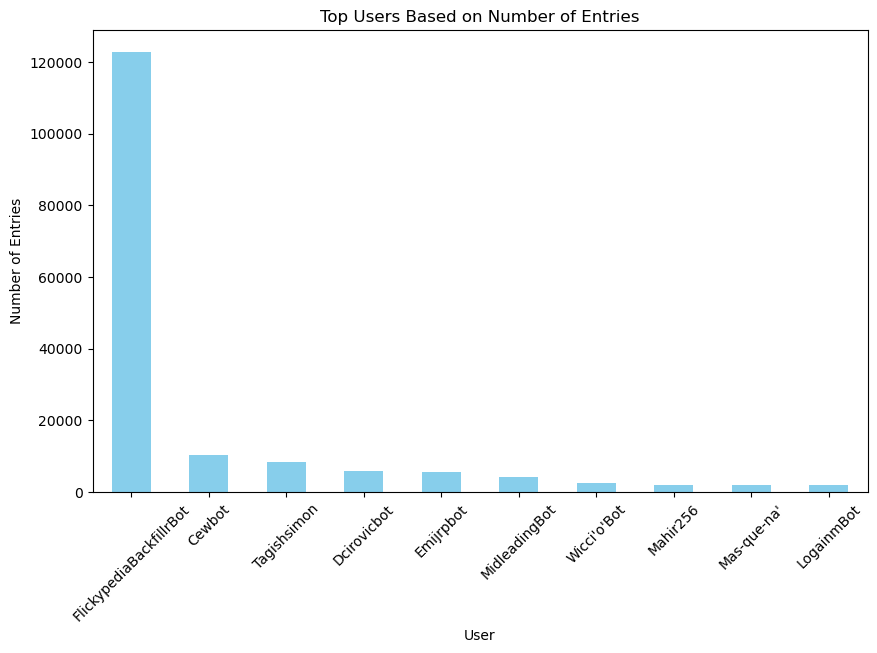

user
FlickypediaBackfillrBot    122769
Cewbot                      10244
Tagishsimon                  8537
Dcirovicbot                  5838
Emijrpbot                    5693
MidleadingBot                4252
Wicci'o'Bot                  2611
Mahir256                     1991
Mas-que-na'                  1933
LogainmBot                   1889
dtype: int64

In [29]:
# Group by 'user' and count the number of entries for each user
user_counts = cleaned_df.groupby('user').size()

# Sort values to get the top users based on number of entries
top_users = user_counts.sort_values(ascending=False).head(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
top_users.plot(kind='bar', color='skyblue')
plt.xlabel('User')
plt.ylabel('Number of Entries')
plt.title('Top Users Based on Number of Entries')
plt.xticks(rotation=45)
plt.show()

top_users